In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
!pip install -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pickle
import gensim
data = pickle.load(open("image_vectors.p", "rb"))
word_vector = pickle.load(open("bert_embeddings.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

768
11840
11840
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0001_796111.jpg
Black_Footed_Albatross_0002_55.jpg
Black_Footed_Albatross_0003_796136.jpg
Black_Footed_Albatross_0005_796090.jpg
Black_Footed_Albatross_0006_796065.jpg
Black_Footed_Albatross_0007_796138.jpg
Black_Footed_Albatross_0008_796083.jpg
Black_Footed_Albatross_0009_34.jpg


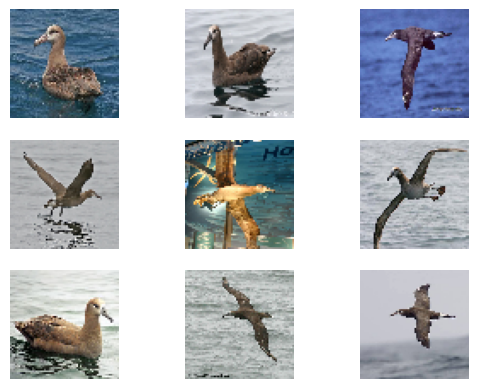

In [4]:

import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import expand_dims
from random import randint, choice

def random_flip(image):
    image = tf.image.flip_left_right(image)
    return image.numpy()

def random_jitter(image):
    image = expand_dims(image, 0) #add additional dimension necessary for zooming
    image = image_augmentation_generator.flow(image, batch_size=1)
    result = image[0].reshape(image[0].shape[1:]) #remove additional dimension (1, 64, 64, 3) to (64, 64, 3)
    return result

image_augmentation_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.8, 1.0]) # random zoom proves to be helpful in capturing more details https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

n = 227
image_embeddings = []
captions = []
labels = []
for i, k in enumerate(data.keys()):
    image_embeddings.append(data[k])
    captions.append(word_vector[k])
    #print(word_vector[k])
    labels.append(k)
    #print(k)
    if i % n == 0:
        image_embeddings.append(random_jitter(data[k]))
        captions.append(word_vector[k])
        labels.append(k)

print(len(word_vector[k]))
print(len(captions))
print(len(image_embeddings))

pyplot.axis('off')
slcie = image_embeddings[40:50]
for i in range(9):
    pyplot.subplot(3, 3, i+1)
    pyplot.imshow(array_to_img(slcie[i]))
    print(labels[i])
    pyplot.axis('off')

pyplot.show()

In [5]:
import numpy as np

def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]


In [6]:
choice(model.index_to_key)

'neurocognitive_outcomes'

In [7]:
len(model[choice(model.index_to_key)])

300

In [8]:
result_array = np.empty((0, 300))

In [9]:
choice(model.index_to_key)

'Corporation_NYSE_CVX'

In [10]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [11]:
import tensorflow_hub as hub
import tensorflow_text
preprocess_url = 'bert_en_uncased_preprocess_3'
encoder_url = 'bert_en_uncased_L-12_H-768_A-12_4'
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

In [12]:
def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()

In [13]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(1):
     result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [14]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(1):
     result_array = np.append(result_array, lbs[randint(0,11830)], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [15]:
def generate_random_vectors(n_samples):  
    vectorized_random_captions = []
    #print(n_samples)
    for n in range(n_samples): #batch size
        rnd = randint(8, 25) # number of tokens in a sentence
        result_array = np.empty((0, 768)) #embedding size (will change)
        rand_sentence = []
        s = ''
        for i in range(rnd):
            if (i==rnd-1):
                s = s + choice(model.index_to_key)
                continue
            s = s + choice(model.index_to_key) + ' '
            #rand_sentence.append(choice(model.index_to_key))
            #result_array = np.append(result_array, [model[choice(model.index_to_key)]], axis=0) #embedding vector for the sentence
        result_array = np.append(result_array, create_sent_vector(s),axis =0 )
        #print(result_array.shape)
        rand_sentence.append(s)
        #result_array = np.append(result_array, rand_sentence, axis=0)
        vectorized_random_captions.append(result_array.astype('float32')) # final list

    return np.array(vectorized_random_captions).reshape(n_samples,768)

In [16]:
#lbs[1].reshape(1,768)

In [17]:
def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 768))
    for i in range(rnd):
     result_array = np.append(result_array, lbs[randint(0,11830)].reshape(1,768), axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)

In [18]:
#lola = generate_random_vectors(32)

In [19]:
#type(lola)

In [20]:
#lola.shape

In [21]:
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.utils import plot_model

In [22]:


# Discriminator model
def define_discriminator():
    word_vector_dim = 768
    dropout_prob = 0.4

    in_label = layers.Input(shape=(768,))
    li = layers.BatchNormalization()(in_label)
    li = layers.Dense(300)(li)
    
    n_nodes = 3 * 64 * 64
    li = layers.Dense(n_nodes)(li)
    li = layers.Reshape((64, 64, 3))(li)

    dis_input = layers.Input(shape=(64, 64, 3))

    merge = layers.Concatenate()([dis_input, li])

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(merge)
    discriminator = layers.LeakyReLU(0.2)(discriminator)
    discriminator = layers.GaussianNoise(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU()(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Flatten()(discriminator)

    discriminator = layers.Dense(1024)(discriminator)

    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Dense(1)(discriminator)

    discriminator_model = Model(inputs=[dis_input, in_label], outputs=discriminator)

    #discriminator_model.summary()

    return discriminator_model


def resnet_block(model, kernel_size, filters, strides):
    gen = model
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen, model])
    return model


# Generator model
def define_generator():
    kernel_init = tf.random_normal_initializer(stddev=0.02)
    batch_init = tf.random_normal_initializer(1., 0.02)

    random_input = layers.Input(shape=(100,))
    text_input1 = layers.Input(shape=(768,))
    text_layer1 = layers.BatchNormalization()(text_input1)
    text_layer1 = layers.Dense(300)(text_layer1)
    
    text_layer2 = layers.Dense(8192)(text_layer1)
    text_layer3 = layers.Reshape((8, 8, 128))(text_layer2)

    n_nodes = 128 * 8 * 8
    gen_input_dense = layers.Dense(n_nodes)(random_input)
    generator = layers.Reshape((8, 8, 128))(gen_input_dense)

    merge = layers.Concatenate()([generator, text_layer3])

    model = layers.Conv2D(filters=64, kernel_size=9, strides=1, padding="same")(merge)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)

    gen_model = model

    for _ in range(4):
      model = resnet_block(model, 3, 64, 1)

    model = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen_model, model])

    model = layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(model)

    generator_model = Model(inputs=[random_input, text_input1], outputs=model)

    #generator_model.summary()

    return generator_model

In [23]:
g_plot = define_generator()

In [24]:
from tensorflow.keras.utils import plot_model

In [25]:
!apt install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [26]:
!pip install pydot
!pip install graphviz
!pip install pydotplus

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [27]:
import pydot
import pydotplus
import graphviz


In [28]:
disc_plot = define_discriminator()

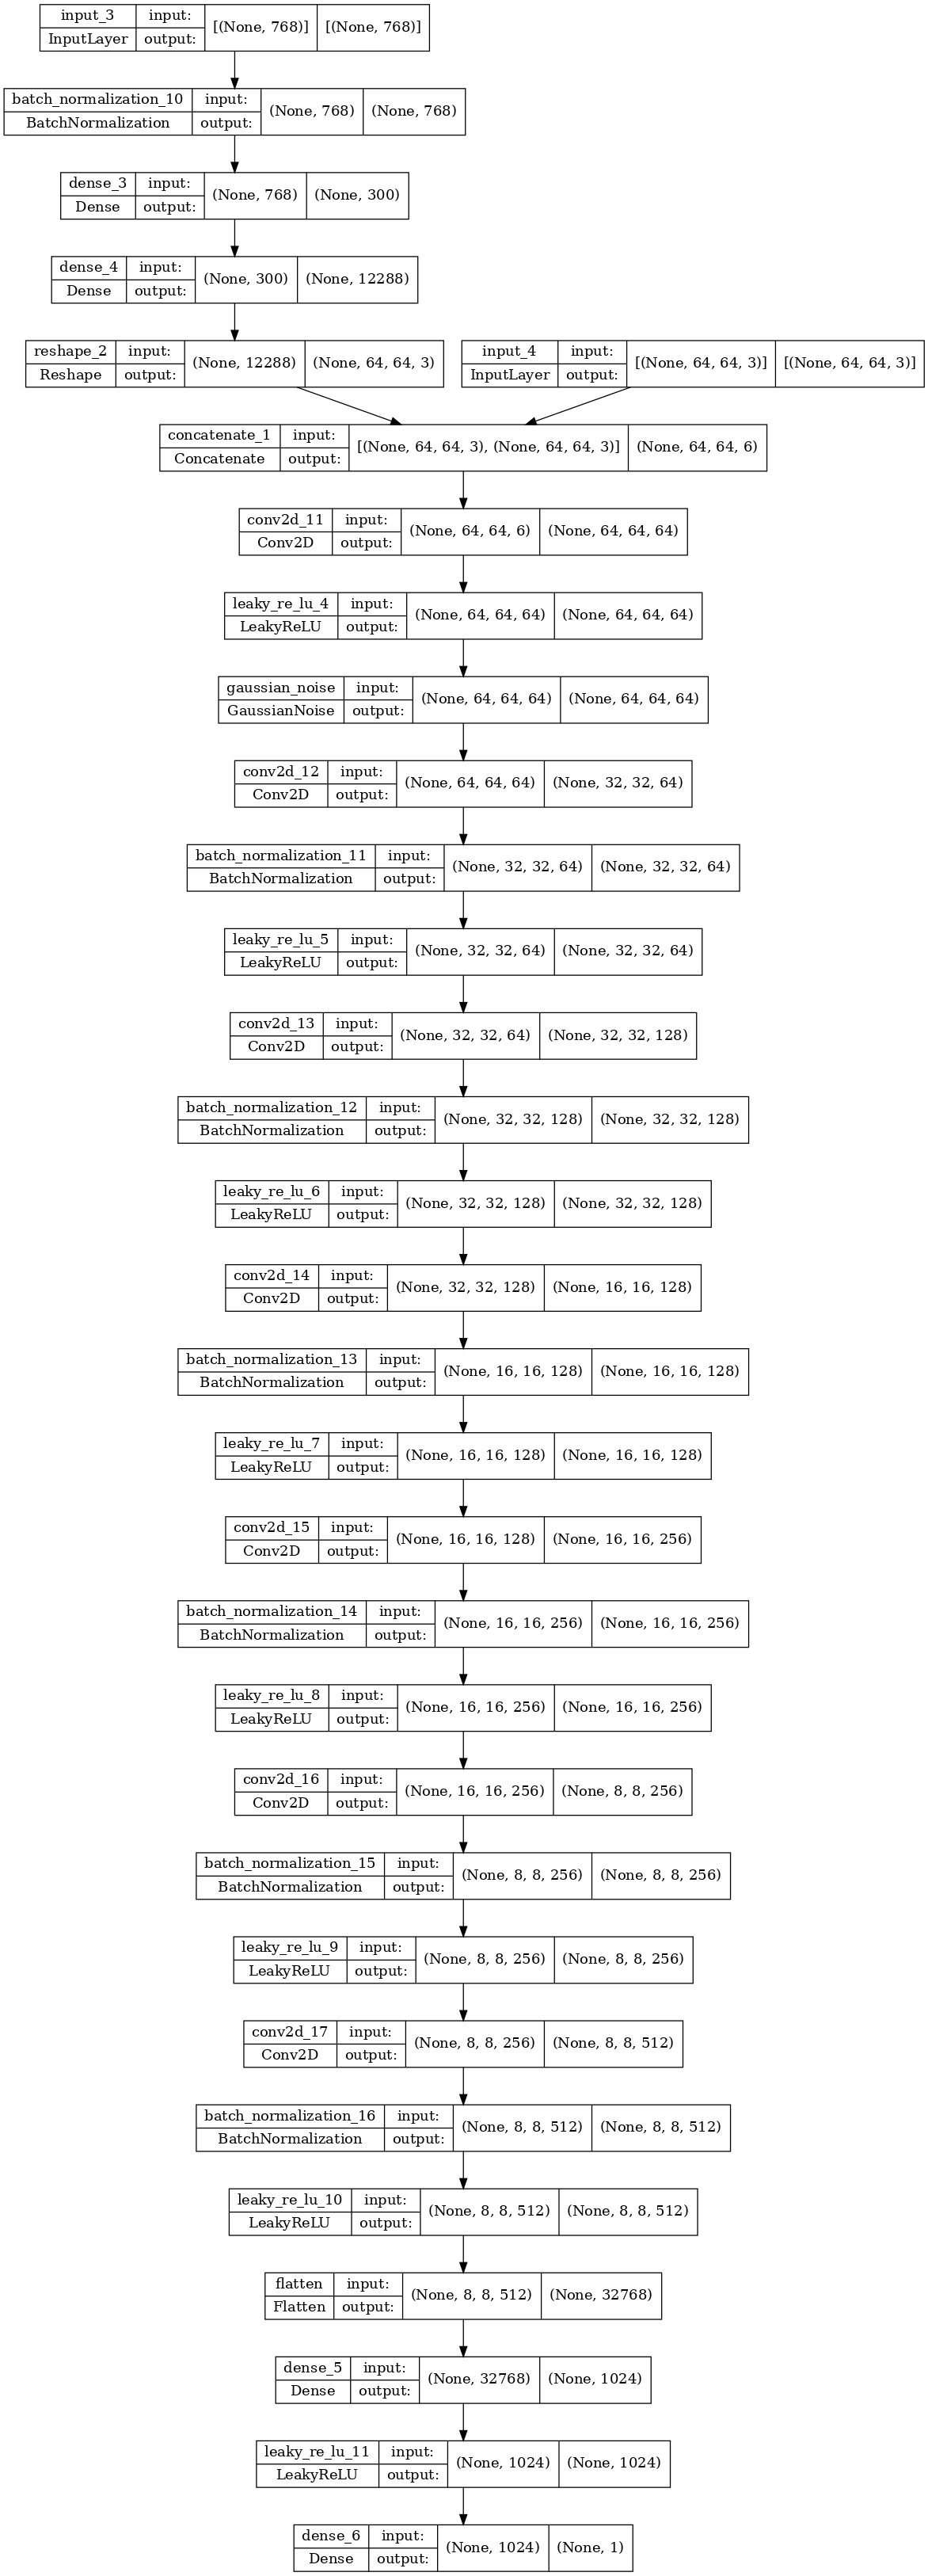

In [29]:
plot_model(disc_plot,to_file="disc_model_bert_batnorm.png",show_shapes=True,dpi=92)

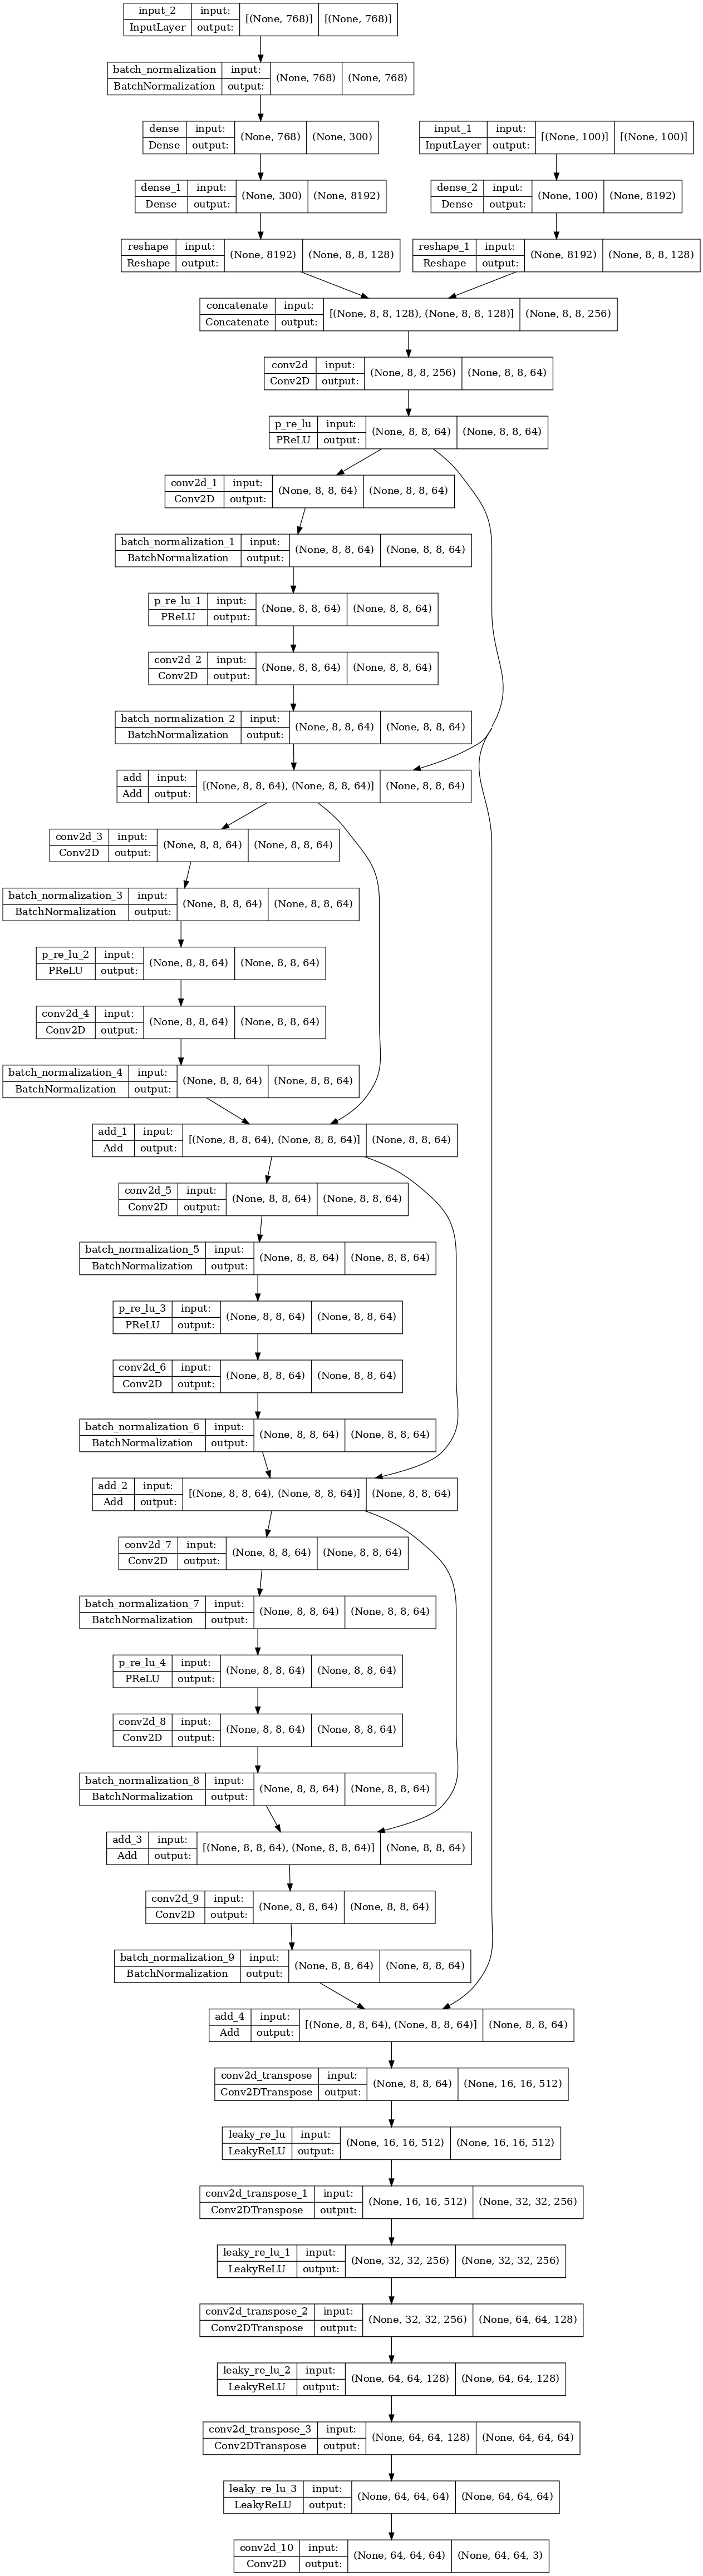

In [30]:
plot_model(g_plot,to_file="gen_model_bert_batnorm.png",show_shapes=True,dpi=92)

In [31]:
g_plot.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 768)         3072        ['input_2[0][0]']                
 alization)                                                                                       
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          230700      ['batch_normalization[0][0]']

                                                                                                  
 add_3 (Add)                    (None, 8, 8, 64)     0           ['add_2[0][0]',                  
                                                                  'batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 8, 8, 64)     36928       ['add_3[0][0]']                  
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 8, 8, 64)    256         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 add_4 (Add)                    (None, 8, 8, 64)     0           ['p_re_lu[0][0]',                
          

In [32]:
from IPython.display import clear_output


def generate_latent_points(latent_dim, n_samples):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions = get_random_word_vectors_from_dataset(n_samples)
    return [x_input, text_captions]

# Randomly flip some labels. Credits to https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/
def noisy_labels(y, p_flip):
    n_select = int(p_flip * int(y.shape[0]))
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)

    op_list = []
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1.0, y[i]))
        else:
            op_list.append(y[i])

    outputs = tf.stack(op_list)
    return outputs

def load_data():
    return asarray(image_embeddings), asarray(captions).astype('float32')

def smooth_positive_labels(y):
	return y - 0.3 + (np.random.random(y.shape) * 0.5)
 
def smooth_negative_labels(y):
	return y + np.random.random(y.shape) * 0.3

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[7, 7])

  for i in range(predictions.shape[0]):
      pyplot.subplot(5, 5, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.savefig('emb_results/image_at_epoch_{:04d}.png'.format(epoch))
  pyplot.show()


def discriminator_loss(r_real_output_real_text, f_fake_output_real_text_1, f_real_output_fake_text):
   alpha = 0.5
   real_output_noise = smooth_positive_labels(noisy_labels(tf.ones_like(r_real_output_real_text), 0.10))
   fake_output_real_text_noise_1 = smooth_negative_labels(tf.zeros_like(f_fake_output_real_text_1))
   real_output_fake_text_noise = smooth_negative_labels(tf.zeros_like(f_real_output_fake_text))

   real_loss = tf.reduce_mean(binary_cross_entropy(real_output_noise, r_real_output_real_text))
   fake_loss_ms_1 = tf.reduce_mean(binary_cross_entropy(fake_output_real_text_noise_1, f_fake_output_real_text_1))
   fake_loss_2 = tf.reduce_mean(binary_cross_entropy(real_output_fake_text_noise, f_real_output_fake_text))

   total_loss = real_loss + alpha * fake_loss_2 + (1-alpha) * fake_loss_ms_1 
   return total_loss

def generator_loss(f_fake_output_real_text):
   return tf.reduce_mean(binary_cross_entropy(tf.ones_like(f_fake_output_real_text), f_fake_output_real_text))

@tf.function
def train_step(images, epoch,n_batch):

    #define half_batch
  latent_dim = 100
  #n_batch = 16
  half_batch = int(n_batch/2)
  noise_1 = tf.random.normal([half_batch, latent_dim])
  noise_2 = tf.random.normal([half_batch, latent_dim])
  real_captions = images[1]
  real_images = images[0]

  random_captions = generate_random_vectors(n_batch)
  random_captions_1, random_captions_2  = tf.split(random_captions, 2, 0)
  real_captions_1, real_captions_2  = tf.split(real_captions, 2 ,0)
  real_images_1, real_images_2 = tf.split(real_images, 2, 0)
  d_loss = 0
  g_loss = 0
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    noise = tf.concat([noise_1, noise_2], 0)

    generated_images = generator([noise, real_captions], training=True)

    fake_1, fake_2 = tf.split(generated_images, 2, 0)

    f_fake_output_real_text_1 = discriminator([fake_1, real_captions_1], training=True)
    f_fake_output_real_text_2 = discriminator([fake_2, real_captions_2], training=True)

    r_real_output_real_text_1 = discriminator([real_images_1, real_captions_1], training=True)
    r_real_output_real_text_2 = discriminator([real_images_2, real_captions_2], training=True)

    f_real_output_fake_text_1 = discriminator([real_images_1, random_captions_1], training=True)
    f_real_output_fake_text_2 = discriminator([real_images_2, random_captions_2], training=True)

    #### Calculating losses ####

    gen_loss = generator_loss(f_fake_output_real_text_1) + generator_loss(f_fake_output_real_text_2) 
    # mode seeking loss
    lz = tf.math.reduce_mean(tf.math.abs(fake_2-fake_1)) / tf.math.reduce_mean(tf.math.abs(noise_2-noise_1))
    eps = 1 * 1e-5
    loss_lz = 1 / (eps+lz) * ms_loss_weight
    total_gen_loss = gen_loss + loss_lz
    g_loss = total_gen_loss
    #if epoch % 10 == 0:
     #   tf.print('G_loss', [total_gen_loss])

    disc_loss_1 = discriminator_loss(r_real_output_real_text_1, f_fake_output_real_text_1, f_real_output_fake_text_1)
    disc_loss_2 = discriminator_loss(r_real_output_real_text_2, f_fake_output_real_text_2, f_real_output_fake_text_2)
    
    total_disc_loss = disc_loss_1 + disc_loss_2
    d_loss = total_disc_loss
        
    

    #### Done calculating losses ####
  if epoch % 10 == 0:
    tf.print('D_loss', [total_disc_loss])
    tf.print('G_loss', [g_loss])
  gradients_of_discriminator = disc_tape.gradient(total_disc_loss, discriminator.trainable_variables)  

  gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables)    

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


from tqdm.notebook import tqdm
def train(dataset, n_batch,start = 0, epochs = 2000):

  checkpoint_dir = 'checkpoint/emb_bert_batnorm'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)
  
  ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
  if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)  #ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')

  for epoch in tqdm(range(start, epochs)):
    start = time.time()
    for image_batch in dataset:
        train_step(image_batch, epoch,n_batch) 

    if (epoch) % 10 == 0:
      [z_input, labels_input] = generate_latent_points(100, 25)
      generate_and_save_images(generator,
                            epoch + 1,
                             [z_input, labels_input])

    if (epoch) % 10 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

    if (epoch) % 10 == 0:
      generator.save('models_emb/46stage_new_gan_animal_model_%03d.h5' % (epoch + 1))     

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))



In [33]:
tf.config.run_functions_eagerly(True)

In [34]:
#gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
#session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [35]:
#len(lbs[1])

Latest checkpoint restored!!


  0%|          | 0/1996 [00:00<?, ?it/s]

Time for epoch 5 is 405.18428564071655 sec
Time for epoch 6 is 406.5496983528137 sec
Time for epoch 7 is 408.6179733276367 sec
Time for epoch 8 is 404.4913215637207 sec
Time for epoch 9 is 411.55315470695496 sec
Time for epoch 10 is 400.26810812950134 sec
D_loss [1.82983851]
G_loss [3.96687508]
D_loss [2.22478437]
G_loss [3.55520535]
D_loss [2.30329347]
G_loss [2.12599802]
D_loss [2.02374935]
G_loss [3.14927864]
D_loss [2.06154871]
G_loss [3.28225136]
D_loss [3.23654246]
G_loss [3.67126703]
D_loss [3.19882298]
G_loss [1.86397254]
D_loss [3.08244848]
G_loss [2.08424044]
D_loss [3.21469]
G_loss [4.01847553]
D_loss [2.51355982]
G_loss [3.55982924]
D_loss [2.70817494]
G_loss [2.99616218]
D_loss [2.62648058]
G_loss [3.36767626]
D_loss [2.07305574]
G_loss [2.52192593]
D_loss [2.25689626]
G_loss [2.57181644]
D_loss [2.50283933]
G_loss [4.44446421]
D_loss [1.88147116]
G_loss [2.65007353]
D_loss [3.09750128]
G_loss [1.8723352]
D_loss [2.28635931]
G_loss [3.14139605]
D_loss [3.61740446]
G_loss [

G_loss [3.29092598]
D_loss [2.18015027]
G_loss [2.37685084]
D_loss [2.14091301]
G_loss [2.88976669]
D_loss [2.27364731]
G_loss [3.19351912]
D_loss [2.77767086]
G_loss [4.4773674]
D_loss [2.10706854]
G_loss [2.51793909]
D_loss [2.698946]
G_loss [2.35207272]
D_loss [2.04372311]
G_loss [3.26115322]
D_loss [2.71976614]
G_loss [5.25838852]
D_loss [2.70991158]
G_loss [2.81656909]
D_loss [2.495821]
G_loss [3.16604233]
D_loss [2.64115]
G_loss [2.27085423]
D_loss [2.37973881]
G_loss [2.05415511]
D_loss [1.54665828]
G_loss [3.29582548]
D_loss [2.45014262]
G_loss [4.0120368]
D_loss [2.45687652]
G_loss [3.390553]
D_loss [3.03911304]
G_loss [3.15237498]
D_loss [2.3137958]
G_loss [2.6348207]
D_loss [3.04457474]
G_loss [2.67074299]
D_loss [2.41023254]
G_loss [2.57654428]
D_loss [2.34841371]
G_loss [2.92095542]
D_loss [2.52859426]
G_loss [3.15497398]
D_loss [2.57822227]
G_loss [2.33474]
D_loss [2.71625543]
G_loss [2.06531477]
D_loss [2.35615349]
G_loss [3.76858091]
D_loss [2.24262309]
G_loss [2.786011

G_loss [3.05750012]
D_loss [2.74741626]
G_loss [2.90503502]
D_loss [2.62083912]
G_loss [2.08740211]
D_loss [2.7656908]
G_loss [3.02832437]
D_loss [2.10640955]
G_loss [3.36192966]
D_loss [2.09837699]
G_loss [3.29899168]
D_loss [2.39542508]
G_loss [3.41198874]
D_loss [2.46165848]
G_loss [2.7703619]
D_loss [2.32260036]
G_loss [3.28086948]
D_loss [1.99520755]
G_loss [3.00898886]
D_loss [2.28890705]
G_loss [2.97023129]
D_loss [2.24982357]
G_loss [3.1172142]
D_loss [2.53255844]
G_loss [3.32026887]
D_loss [2.41570544]
G_loss [2.46642685]
D_loss [2.92617369]
G_loss [2.01947975]
D_loss [2.50134182]
G_loss [2.73249388]
D_loss [2.02944827]
G_loss [2.9674654]
D_loss [2.4280138]
G_loss [2.52494144]
D_loss [2.51545715]
G_loss [2.8456285]
D_loss [2.25576448]
G_loss [3.09720182]
D_loss [2.6895113]
G_loss [2.94654894]
D_loss [1.94881618]
G_loss [2.64125395]
D_loss [1.99834478]
G_loss [2.44255638]
D_loss [2.49122715]
G_loss [2.41693592]
D_loss [1.93122363]
G_loss [3.29532099]
D_loss [2.08318901]
G_loss 

D_loss [1.95728815]
G_loss [2.82964373]
D_loss [2.25867248]
G_loss [3.41699696]
D_loss [3.26346421]
G_loss [2.93114805]
D_loss [2.40777683]
G_loss [3.83724]
D_loss [2.72774744]
G_loss [2.44041753]
D_loss [2.82412481]
G_loss [1.96357536]
D_loss [2.13862371]
G_loss [4.20171309]
D_loss [2.48068476]
G_loss [4.52107334]
D_loss [2.34207082]
G_loss [2.95175362]
D_loss [2.42727518]
G_loss [2.89861584]
D_loss [2.45978022]
G_loss [3.15957475]
D_loss [3.55503273]
G_loss [4.21671343]
D_loss [2.22324681]
G_loss [2.96265244]
D_loss [2.62334013]
G_loss [3.00897074]
D_loss [2.11961937]
G_loss [3.11644745]
D_loss [1.76640952]
G_loss [3.24557519]
D_loss [2.29878521]
G_loss [2.41103649]
D_loss [2.71248674]
G_loss [2.4459672]
D_loss [1.93606436]
G_loss [2.83124661]
D_loss [2.28201]
G_loss [2.58586335]
D_loss [3.16723847]
G_loss [4.52092075]
D_loss [2.75024033]
G_loss [1.86790156]
D_loss [2.77714062]
G_loss [2.36370826]
D_loss [3.37763667]
G_loss [4.01572037]
D_loss [2.36745691]
G_loss [2.14840865]
D_loss 

G_loss [2.25187]
D_loss [2.01185822]
G_loss [2.92882586]
D_loss [2.40053082]
G_loss [4.23870182]
D_loss [2.71527815]
G_loss [2.56945086]
D_loss [2.09479403]
G_loss [3.0643115]
D_loss [2.81855297]
G_loss [2.21339774]
D_loss [2.3887434]
G_loss [2.4826138]
D_loss [3.22323513]
G_loss [4.51966715]
D_loss [2.1937809]
G_loss [2.52314663]
D_loss [2.67593789]
G_loss [2.37753654]
D_loss [2.30691361]
G_loss [2.49114966]
D_loss [2.35945]
G_loss [3.78197408]
D_loss [2.09224916]
G_loss [2.9275074]
D_loss [2.752038]
G_loss [2.47306561]
D_loss [2.51802492]
G_loss [4.53312445]
D_loss [2.08317947]
G_loss [3.02743053]
D_loss [1.76676834]
G_loss [2.35792089]
D_loss [2.25887728]
G_loss [2.47233677]
D_loss [1.96000993]
G_loss [3.35457277]
D_loss [2.47697687]
G_loss [4.28776312]
D_loss [2.53970909]
G_loss [2.22251987]
D_loss [2.21896648]
G_loss [3.74463034]
D_loss [2.17247772]
G_loss [2.58947897]
D_loss [2.15295887]
G_loss [3.05511713]
D_loss [2.45316768]
G_loss [2.64767933]
D_loss [2.20353556]
G_loss [3.848

G_loss [2.99957132]
D_loss [2.60187817]
G_loss [1.73923111]
D_loss [2.09564495]
G_loss [2.59261918]
D_loss [2.19152713]
G_loss [2.97393584]
D_loss [1.94165707]
G_loss [2.69224072]
D_loss [2.63358974]
G_loss [2.31808424]
D_loss [1.70232272]
G_loss [2.84682512]
D_loss [2.99075913]
G_loss [3.78688]
D_loss [1.92410064]
G_loss [3.11369705]
D_loss [2.26395845]
G_loss [2.15267801]
D_loss [1.97438109]
G_loss [3.53208375]
D_loss [2.57250118]
G_loss [3.12758827]
D_loss [2.69200516]
G_loss [2.21895385]
D_loss [2.48150802]
G_loss [2.50907183]
D_loss [2.08279419]
G_loss [2.17014933]
D_loss [1.32984924]
G_loss [3.21350026]
D_loss [2.85008454]
G_loss [4.31795597]
D_loss [2.43870878]
G_loss [2.80403352]
D_loss [1.78895664]
G_loss [2.35599804]
D_loss [2.52772427]
G_loss [3.88093901]
D_loss [2.18298936]
G_loss [3.03815413]
D_loss [2.58769798]
G_loss [3.43005157]
D_loss [2.6141777]
G_loss [2.11680865]
D_loss [1.99719596]
G_loss [2.54896641]
D_loss [2.43660831]
G_loss [4.08858776]
D_loss [2.10702634]
G_lo

D_loss [3.6411202]
G_loss [5.15037]
D_loss [2.85913706]
G_loss [1.80004668]
D_loss [2.70914316]
G_loss [1.90595198]
D_loss [2.00831079]
G_loss [3.19937]
D_loss [2.62615204]
G_loss [3.09992599]
D_loss [2.00438571]
G_loss [2.85065842]
D_loss [2.77198625]
G_loss [2.23906136]
D_loss [1.82931137]
G_loss [2.9884758]
D_loss [2.02542019]
G_loss [2.66755939]
D_loss [2.06490946]
G_loss [3.0238]
D_loss [2.64120722]
G_loss [3.17596436]
D_loss [2.16514492]
G_loss [3.74023628]
D_loss [2.06507707]
G_loss [2.25376272]
D_loss [2.62016392]
G_loss [3.41268039]
D_loss [2.16373348]
G_loss [2.35842705]
D_loss [2.16047668]
G_loss [3.38298464]
D_loss [2.40417409]
G_loss [2.04220724]
D_loss [2.62177467]
G_loss [3.8566556]
D_loss [2.68502569]
G_loss [3.57470393]
D_loss [2.26354885]
G_loss [2.12432957]
D_loss [2.15478873]
G_loss [2.30570698]
D_loss [2.89378405]
G_loss [5.7040019]
D_loss [2.0285182]
G_loss [2.25874877]
D_loss [2.23788977]
G_loss [2.60719204]
D_loss [2.04560304]
G_loss [3.33692932]
D_loss [2.11485

G_loss [3.26698637]
D_loss [2.40235281]
G_loss [4.06968784]
D_loss [1.97128248]
G_loss [2.55402446]
D_loss [2.758358]
G_loss [2.35901666]
D_loss [2.07804632]
G_loss [3.63074064]
D_loss [1.73717391]
G_loss [3.98348236]
D_loss [2.31240034]
G_loss [2.33144808]
D_loss [3.21052742]
G_loss [4.15388489]
D_loss [3.06404757]
G_loss [2.26441789]
D_loss [2.78710485]
G_loss [2.00979185]
D_loss [2.384552]
G_loss [3.90911555]
D_loss [1.82982039]
G_loss [3.24081898]
D_loss [2.34132361]
G_loss [3.51763964]
D_loss [2.70551968]
G_loss [2.93328428]
D_loss [2.4892621]
G_loss [2.59317589]
D_loss [2.98359728]
G_loss [4.06087732]
D_loss [2.44719648]
G_loss [2.64352226]
D_loss [2.66660571]
G_loss [2.54819036]
D_loss [2.4184587]
G_loss [2.46276212]
D_loss [2.80455184]
G_loss [4.7536912]
D_loss [2.45908594]
G_loss [2.43034315]
D_loss [2.542665]
G_loss [2.4810245]
D_loss [1.97931027]
G_loss [2.64481354]
D_loss [2.31985021]
G_loss [2.76679802]
D_loss [2.34273458]
G_loss [3.39014101]
D_loss [2.90231419]
G_loss [2.

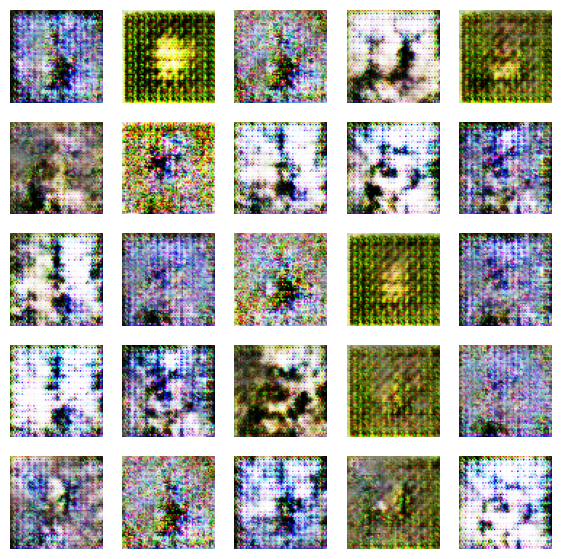

Saving checkpoint for epoch 11 at checkpoint/emb_bert_batnorm/ckpt-2
Time for epoch 11 is 421.9089026451111 sec
Time for epoch 12 is 426.8658483028412 sec
Time for epoch 13 is 423.6802935600281 sec
Time for epoch 14 is 410.7381525039673 sec
Time for epoch 15 is 424.49200797080994 sec


In [ ]:
ms_loss_weight = 1.0
import tensorflow as tf
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)

discriminator = define_discriminator()
generator = define_generator()

images, lbs = load_data()
BUFFER_SIZE = images.shape[0]
n_batch = 8

train_dataset = tf.data.Dataset.from_tensor_slices((images,lbs)).shuffle(BUFFER_SIZE).batch(n_batch)

train(train_dataset,n_batch,start=4)

In [ ]:
#
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint
import numpy as np

def create_sent_vector(sent):
    sent = [sent]
    text_preprocessed = bert_preprocess_model(sent)
    final = bert_model(text_preprocessed)
    return final['pooled_output'].numpy()
    #result_array = np.empty((0, 300))

  #for word in word_tokenize(sent):
    #result_array = np.append(result_array, [model[word]], axis=0)
  #final = np.mean(result_array, axis=0).astype('float32')
  #return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      #e.reshape(1,768)
      print(e.shape)
      flag = False
      for i in range(n_samples):
        
        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions]

#gen_model = tf.keras.models.load_model('/content/drive/My Drive/146stage_new_gan_animal_model_120.h5')

for i in range(1):
  generate_images(generator, generate_latent_points(100, 9))
pyplot.show()

In [ ]:
def get_index_by_label(label):
  for idx, l in enumerate(labels):
    if l in label:
      return idx


print(get_index_by_label('Western_Wood_Pewee_0061_795060.jpg'))

In [ ]:
# Show image in image embeddings

pyplot.figure(figsize=[8, 8])

pyplot.subplot(1, 2, 0+1)
pyplot.imshow(array_to_img(image_embeddings[5432]))
pyplot.axis('off')
pyplot.show()

In [ ]:
import tensorflow as tf
#gen_model = tf.keras.models.load_model('models/46stage_new_gan_animal_model_781.h5')

In [ ]:
import numpy as np
def get_random_word_vectors_from_dataset(n_samples,captions):
    ix = np.random.randint(0, len(captions), n_samples)
    return np.asarray(captions)[ix]

In [ ]:
def de7ko(cap):
    f = create_sent_vector(cap)
    v = []
    flag = False
    for i in range(1):    
        v.append(f)
        flag = True
    return np.asarray(v), np.asarray([])

In [ ]:
noise = tf.random.normal((1,100))

In [ ]:
caption = create_sent_vector('This bird is blue')

In [ ]:
print(noise.shape)

In [ ]:
noise = tf.random.normal((1,100))

In [ ]:
predictions = generator([noise,cap], training=False)

In [ ]:
pyplot.figure(figsize=[2, 2])

pyplot.imshow(array_to_img(predictions.numpy()[0]))
pyplot.axis('off')
pyplot.show()

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
import string

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS

all_stopwords_gensim = STOPWORDS.union(set(['a']))

In [ ]:
def make_prediction(cap):
    text = cap
    cap = remove_stopwords(text)
    cap = cap.translate(str.maketrans('','', string.punctuation))
    noise = tf.random.normal((1,100))
    
    caption, _ = de7ko(cap)
    predictions = generator([noise,caption], training=False)
    pyplot.figure(figsize=[5, 5])
    pyplot.imshow(array_to_img(predictions.numpy()[0]))
    pyplot.axis('off')

In [ ]:
def make_prediction_grid(cap):
    pyplot.figure(figsize=[10, 10])

    for i in range(20):
        text = cap
        #cap = remove_stopwords(text)
        #cap = cap.translate(str.maketrans('','', string.punctuation))
        noise = tf.random.normal((1,100))
    
        #caption, _ = de7ko(cap)
        predictions = generator([noise,cap], training=False)
    
        pyplot.subplot(5, 5, i+1)
        pyplot.imshow(array_to_img(predictions.numpy()[0]))
        pyplot.axis('off')
    pyplot.show()

In [ ]:
test = test.reshape(1,768)
make_prediction_grid(test)

In [ ]:
noise, cap = generate_latent_points(100,1)

In [ ]:
tst = []
for i in caps[0]:
    i = abs(i)
    tst.append(str(i))

In [ ]:
mx = max(len(x) for x in tst)

In [ ]:
mx

In [ ]:
cap[0]

In [ ]:
caps = create_sent_vector('this a small bird with fluffy grey feathers and a grey beak.')

In [ ]:
len(test)

In [ ]:
test = []
test = np.array([-8.80453765e-01, -2.30016977e-01,  1.53982677e-02,  7.63145745e-01,
       -1.67636186e-01, -1.12899035e-01,  9.20433581e-01,  2.31789663e-01,
       -1.92173526e-01, -9.99809325e-01, -1.48938507e-01,  5.04856467e-01,
        9.74133551e-01,  2.51672100e-02,  9.12574768e-01, -6.27402663e-01,
       -3.41317058e-01, -5.57229817e-01,  3.86493057e-01, -8.32161784e-01,
        5.95441282e-01,  8.90097916e-01,  4.09509450e-01,  2.50163227e-01,
        3.93467665e-01,  5.93674242e-01, -6.57673061e-01,  9.15036798e-01,
        9.51860309e-01,  7.05915213e-01, -7.49266684e-01,  1.42062679e-01,
       -9.77758586e-01, -2.60669142e-01, -1.55464560e-01, -9.79721069e-01,
        1.93323925e-01, -7.69981802e-01, -9.83245596e-02,  2.95864381e-02,
       -8.72071326e-01,  2.98111081e-01,  9.95922685e-01,  2.26048753e-01,
        9.48943347e-02, -3.52533966e-01, -9.99241948e-01,  2.67680496e-01,
       -8.80547166e-01,  2.29656994e-01,  1.56744406e-01, -3.83794233e-02,
        1.54842883e-01,  4.10892785e-01,  4.32878345e-01,  2.77051806e-01,
       -1.26063168e-01,  1.05151318e-01, -1.20240554e-01, -5.75469494e-01,
       -5.82406163e-01,  3.11504900e-01, -2.16019571e-01, -8.77511382e-01,
        1.88881099e-01, -1.96082413e-01, -9.12517831e-02, -1.99827895e-01,
        7.07085105e-03, -5.99269308e-02,  8.59454513e-01,  1.55581653e-01,
        2.55471617e-01, -7.69784927e-01, -8.00335184e-02,  1.71866283e-01,
       -6.24659777e-01,  9.99961853e-01, -5.86809397e-01, -9.69742000e-01,
       -5.30491509e-02,  3.83228483e-03,  5.26301026e-01,  3.91498595e-01,
       -2.09871814e-01, -9.99847651e-01,  4.50981826e-01, -9.65828672e-02,
       -9.84176159e-01,  1.81323260e-01,  3.74678403e-01, -2.23348811e-01,
       -2.78360933e-01,  4.80318844e-01, -3.10938448e-01, -2.59735644e-01,
       -3.37920517e-01,  8.21603171e-04, -2.34830663e-01, -1.45366967e-01,
        8.19220021e-02, -1.97157651e-01, -6.95125610e-02, -3.61513615e-01,
        2.15650231e-01, -3.76727879e-01, -4.95858014e-01,  2.90638179e-01,
       -2.61082619e-01,  6.50961041e-01,  4.02054161e-01, -2.60238439e-01,
        3.67120296e-01, -9.51097190e-01,  5.91515958e-01, -1.98343113e-01,
       -9.71337318e-01, -5.65517545e-01, -9.80491877e-01,  7.09538043e-01,
       -1.49333894e-01, -1.58831924e-01,  9.45483029e-01,  2.92326093e-01,
        2.65603542e-01, -5.56376502e-02, -1.24673292e-01, -9.99982238e-01,
       -4.98333573e-01, -3.81835163e-01,  1.58755630e-01, -1.43947557e-01,
       -9.65010941e-01, -9.38152313e-01,  5.70341170e-01,  9.40006912e-01,
        1.62885293e-01,  9.92381215e-01, -2.85812289e-01,  9.12721992e-01,
       -1.74228549e-02, -3.11304063e-01, -8.08087736e-02, -3.95101398e-01,
        4.81125981e-01,  5.60868144e-01, -7.57838190e-01,  2.26778656e-01,
       -9.34472904e-02,  3.15034948e-02, -1.74440235e-01, -2.80600965e-01,
       -4.31810282e-02, -9.16801214e-01, -4.28465188e-01,  9.33690965e-01,
        1.69587761e-01, -1.29056215e-01,  5.24189889e-01, -2.63950288e-01,
       -4.53741968e-01,  8.22614193e-01,  4.66421396e-01,  3.39254558e-01,
       -8.45761150e-02,  3.94497246e-01,  3.92881036e-02,  4.73652571e-01,
       -8.50350320e-01,  1.59737349e-01,  3.63531709e-01, -2.73319781e-01,
       -9.77459271e-03, -9.66823697e-01, -3.28776777e-01,  4.89139616e-01,
        9.82344329e-01,  7.43519425e-01,  1.67659357e-01,  2.87553787e-01,
       -1.98833376e-01,  3.36682081e-01, -9.23790514e-01,  9.62900639e-01,
       -2.52083212e-01,  1.93947464e-01,  4.74669129e-01, -1.57359019e-01,
       -8.80155325e-01, -2.85705864e-01,  8.50389242e-01, -1.75189227e-01,
       -8.44866455e-01, -4.01739515e-02, -4.83462155e-01, -3.62090886e-01,
       -5.19712195e-02,  6.22924566e-01, -1.95959553e-01, -3.72283012e-01,
       -9.64309052e-02,  8.78189862e-01,  9.69230950e-01,  7.94695258e-01,
       -2.17274353e-01,  5.83401918e-01, -8.97849441e-01, -4.99798775e-01,
        1.34419411e-01,  2.60206789e-01,  1.61342382e-01,  9.89440918e-01,
       -3.33645530e-02, -1.43169940e-01, -9.05669749e-01, -9.77330387e-01,
        5.21452911e-02, -8.86295915e-01, -5.84830940e-02, -6.78180814e-01,
        3.56054783e-01,  6.64208710e-01,  4.78770360e-02,  3.81819487e-01,
       -9.83062446e-01, -7.61405647e-01,  2.95404553e-01, -3.38265955e-01,
        3.48766744e-01, -1.97353199e-01,  1.09244935e-01,  3.06839556e-01,
       -5.88864446e-01,  8.29047263e-01,  8.68932068e-01,  1.71525925e-01,
       -7.35009491e-01,  8.51148307e-01, -3.25095803e-01,  8.66294026e-01,
       -6.01488590e-01,  9.66577828e-01,  3.54924738e-01,  6.39811277e-01,
       -9.21796322e-01,  1.57003462e-01, -9.12463844e-01, -7.16707259e-02,
       -1.70224771e-01, -4.98019695e-01,  1.44815519e-01,  5.67531586e-01,
        2.87521541e-01,  6.14224195e-01, -5.64075232e-01,  9.94957328e-01,
       -6.29881099e-02, -9.34747159e-01,  5.54220200e-01, -2.11754054e-01,
       -9.77951109e-01,  2.71397412e-01,  2.88977623e-01, -3.89038742e-01,
       -3.91004741e-01, -3.56953144e-01, -9.30561066e-01,  9.18217123e-01,
        1.28633559e-01,  9.86722648e-01,  2.00015992e-01, -9.36000824e-01,
       -3.92773002e-01, -8.75337780e-01, -1.06749311e-01, -7.13189319e-02,
        3.57307464e-01, -1.67331904e-01, -9.38466966e-01,  4.40262258e-01,
        5.06743670e-01,  4.01247531e-01,  2.14894488e-01,  9.93849218e-01,
        9.91616964e-01,  9.65101063e-01,  8.59126866e-01,  8.83121252e-01,
       -8.06268036e-01,  2.92547524e-01,  9.99889493e-01, -6.24044478e-01,
       -9.99511600e-01, -9.25504804e-01, -6.13347590e-01,  4.61226195e-01,
       -9.99978721e-01, -4.35862578e-02, -5.63575774e-02, -9.03630733e-01,
       -1.23193599e-02,  9.65929747e-01,  9.85314488e-01, -9.99925315e-01,
        8.18023086e-01,  9.34401751e-01, -6.25441492e-01,  4.33474094e-01,
       -1.15517735e-01,  9.60539162e-01,  4.20662582e-01,  2.10319638e-01,
       -1.94298044e-01,  2.61679113e-01, -2.90394723e-01, -8.57349575e-01,
        3.76219042e-02,  1.55106738e-01,  5.88076830e-01,  2.07368523e-01,
       -7.28735924e-01, -8.98608923e-01, -2.51970261e-01, -1.01329803e-01,
       -2.15276599e-01, -9.38434422e-01, -1.67465955e-01, -1.88226134e-01,
        7.15597451e-01,  9.98114645e-02,  2.45786130e-01, -7.47976780e-01,
        1.92577228e-01, -3.39228004e-01,  4.36852425e-01,  6.28403664e-01,
       -8.97152483e-01, -7.05661297e-01, -5.60296357e-01, -3.01484793e-01,
        9.85715091e-02, -9.29942667e-01,  9.63285446e-01, -2.89033115e-01,
        2.71024317e-01,  9.99940097e-01, -2.87726194e-01, -8.66553664e-01,
        3.68165404e-01,  2.35099897e-01, -3.89547825e-01,  9.99905884e-01,
        5.68111420e-01, -9.65960324e-01, -5.37417591e-01,  2.14174345e-01,
       -3.69943380e-01, -4.46400106e-01,  9.96882021e-01, -1.75380498e-01,
        3.96185033e-02,  2.15842038e-01,  9.57530499e-01, -9.80891228e-01,
        4.69241440e-01, -9.00335252e-01, -9.46272433e-01,  9.42983091e-01,
        9.25438702e-01, -2.12100297e-01, -6.29902184e-01,  7.66361281e-02,
       -2.10510582e-01,  2.49523237e-01, -9.47067678e-01,  6.87735081e-01,
        5.29013634e-01, -1.82782546e-01,  8.92122090e-01, -9.10025537e-01,
       -5.06010354e-01,  3.63316894e-01, -1.09232731e-01,  2.65939206e-01,
        2.42671907e-01,  4.59666908e-01, -3.23862642e-01,  6.19740076e-02,
       -2.11146951e-01,  1.93632647e-01, -9.56532419e-01,  2.12749362e-01,
        9.99873579e-01,  1.31009445e-01, -2.07210526e-01, -1.89908087e-01,
       -7.35443085e-02, -2.63732821e-01,  2.73128897e-01,  4.32980269e-01,
       -2.25038186e-01, -7.89038599e-01,  4.99954112e-02, -9.32942390e-01,
       -9.73070741e-01,  7.63639569e-01,  1.87113822e-01, -3.09123665e-01,
        9.96837556e-01,  3.05217206e-01,  1.98344052e-01, -1.22368887e-01,
        4.71835315e-01, -1.49252638e-02,  5.69303453e-01, -1.74877137e-01,
        9.61008668e-01, -2.57232845e-01,  5.34489751e-01,  8.43871593e-01,
       -1.16998672e-01, -3.26318592e-01, -6.18683279e-01,  4.58297320e-02,
       -8.90101075e-01, -8.33739787e-02, -9.42334473e-01,  9.50139284e-01,
        4.93264906e-02,  3.24228555e-01,  1.96017206e-01,  9.70596820e-02,
        9.99930620e-01,  3.66374999e-01,  6.45800948e-01, -7.47105300e-01,
        8.90407145e-01, -7.44303763e-01, -7.42500603e-01, -3.09464961e-01,
       -2.08001584e-02, -5.59380976e-03, -2.29554608e-01,  3.11805397e-01,
       -9.66267705e-01,  5.95647022e-02,  2.00326554e-02, -9.74688530e-01,
       -9.84825373e-01,  2.79958844e-01,  7.92584121e-01,  6.14665635e-02,
       -4.73468482e-01, -6.69615269e-01, -5.50240636e-01,  2.80475497e-01,
       -2.22083390e-01, -9.09992814e-01,  3.85517538e-01, -2.18076855e-01,
        5.21199286e-01, -2.35613927e-01,  5.27731359e-01, -9.42211077e-02,
        7.29738057e-01,  4.48837370e-01,  1.50048375e-01, -7.33408034e-02,
       -8.19662750e-01,  8.19707870e-01, -8.41715693e-01, -1.54426724e-01,
       -1.78749129e-01,  9.99975026e-01, -3.81884128e-01,  2.72284001e-01,
        7.30699599e-01,  7.00210214e-01, -1.46290243e-01,  1.99640587e-01,
        2.05114216e-01,  2.06912100e-01,  1.00090228e-01,  8.23383629e-02,
       -8.65192056e-01, -3.20807785e-01,  4.90280867e-01, -2.96179444e-01,
       -1.64008841e-01,  7.83830106e-01,  1.35429958e-02,  1.31176114e-01,
        4.64188419e-02,  1.48278370e-01,  9.98232186e-01, -2.34221742e-01,
       -7.45560676e-02, -5.66452086e-01, -6.33716881e-02, -2.60931760e-01,
       -7.15886235e-01,  9.99623895e-01,  3.24440211e-01, -1.37580052e-01,
       -9.81491208e-01, -6.80922717e-02, -9.14913177e-01,  9.81398284e-01,
        7.72460043e-01, -8.50191236e-01,  4.97678101e-01,  4.87879574e-01,
       -1.21589467e-01,  8.09250772e-01, -2.32000455e-01, -2.31448591e-01,
        6.61229417e-02,  1.42842367e-01,  9.40303802e-01, -4.58441556e-01,
       -9.51286316e-01, -5.73005080e-01,  3.57860029e-01, -9.35118794e-01,
        8.09217632e-01, -5.25421321e-01, -2.04097047e-01, -2.24277765e-01,
        3.01374257e-01,  8.83164704e-01,  9.79141798e-04, -9.64358449e-01,
       -1.50636300e-01,  2.68379785e-02,  9.58737195e-01,  2.08762795e-01,
       -5.48031032e-01, -9.07494605e-01,  5.12077920e-02,  2.67167002e-01,
        4.13111039e-02, -9.11459029e-01,  9.51420367e-01, -9.75990355e-01,
        4.41281319e-01,  9.99710321e-01,  3.27615529e-01, -3.20269793e-01,
        2.63846397e-01, -5.04201055e-01,  1.81749582e-01, -3.26382294e-02,
        5.91295779e-01, -9.36210454e-01, -2.51662672e-01, -1.50325686e-01,
        2.69483179e-01, -2.11471453e-01,  3.76247942e-01,  6.07654274e-01,
        1.54238224e-01, -5.12871802e-01, -5.40481269e-01, -1.29259616e-01,
        3.58465165e-01,  7.96124995e-01, -2.40997508e-01, -2.07180575e-01,
        1.55750290e-01, -1.75655827e-01, -8.90735269e-01, -2.09824160e-01,
       -2.80681968e-01, -9.39359665e-01,  6.33977294e-01, -9.99955714e-01,
       -1.73266545e-01, -3.48771453e-01, -2.24385709e-01,  7.88768709e-01,
       -1.77228540e-01, -7.27730617e-02, -6.98809505e-01,  2.56371815e-02,
        7.01412201e-01,  7.18198836e-01, -2.75954813e-01, -1.80623353e-01,
       -7.42104530e-01,  2.32816353e-01, -1.13577075e-01,  1.72238290e-01,
       -1.36176959e-01,  6.97673619e-01, -1.46991074e-01,  9.99978900e-01,
        9.71630067e-02, -5.48564017e-01, -9.68859196e-01,  2.92616487e-01,
       -3.06941569e-01,  9.94913995e-01, -9.16791737e-01, -9.30493832e-01,
        2.88737655e-01, -4.94466901e-01, -7.91192114e-01,  1.90008670e-01,
        9.14912485e-03, -6.41962051e-01, -4.21003878e-01,  9.42713678e-01,
        9.04021978e-01, -4.68821436e-01,  2.69322962e-01, -2.79315233e-01,
       -5.00710785e-01,  1.01603508e-01, -4.87051345e-02,  9.79506493e-01,
        2.08938256e-01,  8.91744256e-01,  7.99809575e-01,  1.69496655e-01,
        9.37966049e-01,  2.08653599e-01,  7.03873873e-01,  1.63692415e-01,
        9.99683499e-01,  2.81126201e-01, -9.28109169e-01,  1.48453116e-01,
       -9.75879550e-01, -1.97389424e-01, -9.44519937e-01,  1.80196792e-01,
        1.27985194e-01,  8.55853677e-01, -3.29258949e-01,  9.48341012e-01,
        9.38111544e-02,  5.37090153e-02, -2.21780598e-01,  2.84623384e-01,
        3.46308172e-01, -8.96481156e-01, -9.77293611e-01, -9.81208324e-01,
        3.60633641e-01, -4.39885557e-01, -2.60915589e-02,  2.72721320e-01,
        1.53825805e-01,  3.34862500e-01,  3.46766174e-01, -9.99401927e-01,
        9.10004377e-01,  4.43370312e-01,  7.86779746e-02,  9.47284698e-01,
        2.11832806e-01,  2.03621015e-01,  2.64423519e-01, -9.80728507e-01,
       -9.57503676e-01, -3.13907266e-01, -1.99346349e-01,  8.31723213e-01,
        6.09730542e-01,  8.24902654e-01,  3.71506691e-01, -5.12145579e-01,
       -6.30896613e-02,  3.52403000e-02,  2.25418568e-01, -9.86407340e-01,
        3.62513870e-01,  5.49599342e-02, -9.66617763e-01,  9.44864154e-01,
       -4.76719141e-01, -2.71122605e-01,  5.44964194e-01,  1.03836574e-01,
        9.46267307e-01,  7.58386254e-01,  5.42973876e-01,  8.02935362e-02,
        5.07375717e-01,  8.79801810e-01,  9.42357302e-01,  9.83257651e-01,
       -1.65411681e-01,  7.80230641e-01,  7.37127513e-02,  2.78799653e-01,
        2.96888411e-01, -9.23079848e-01,  1.19074188e-01, -6.59916596e-03,
       -2.21848860e-01,  2.73883551e-01, -2.47740015e-01, -9.53292549e-01,
        5.25448501e-01, -2.35435039e-01,  5.36641955e-01, -3.35360944e-01,
        8.12037811e-02, -4.35863644e-01, -3.00284624e-01, -7.30468512e-01,
       -5.43703556e-01,  5.77575803e-01,  5.00675678e-01,  9.09688711e-01,
        1.23378135e-01, -6.24788217e-02, -6.85352683e-01, -9.68594849e-02,
        2.42555253e-02, -9.14372027e-01,  9.27561104e-01, -8.59253630e-02,
        2.84658521e-01, -1.58948433e-02, -1.19637903e-02,  4.12023872e-01,
       -2.42120147e-01, -3.44680429e-01, -2.60558099e-01, -7.65620589e-01,
        8.20428491e-01, -1.29452050e-02, -4.92897272e-01, -5.63740015e-01,
        6.20155632e-01,  3.01663429e-01,  8.89944553e-01, -6.23011310e-03,
       -1.11036368e-01, -8.12215433e-02, -1.26108110e-01,  2.46278808e-01,
       -4.15876418e-01, -9.99392748e-01,  4.07713711e-01,  7.98859298e-02,
       -1.52374543e-02, -3.07587594e-01,  1.46168573e-02, -1.76984966e-01,
       -9.72682118e-01, -1.63437232e-01, -1.54282555e-01,  1.13290377e-01,
       -5.26515543e-01, -4.79574978e-01,  5.20585597e-01,  2.39529848e-01,
        4.00757641e-01,  8.69178474e-01, -2.06473187e-01,  4.61310953e-01,
        6.24356449e-01,  9.50849205e-02, -5.81183493e-01,  8.87356818e-01])


In [ ]:
caps[0]

In [ ]:
caps = create_sent_vector('This bird is blue')

In [ ]:
caption.shape

In [ ]:
import matplotlib.pyplot as plt
plt.hist(caps[0])
plt.show()

In [ ]:
plt.hist(cap[0])
plt.show()

#### 

In [ ]:
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions , s]


In [ ]:
def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]

In [ ]:
while True:
    noise, cap , s  = generate_latent_points(100,1)
    if (s=='Crested_Auklet_0029_1824.jpg' ):
        print('found!!')
        break

In [ ]:
cap[0]